<a href="https://colab.research.google.com/github/nipa010/Machine-Learning/blob/main/Absentism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [ ]:
# loading the data from csv file to a Pandas DataFrame
data = pd.read_csv('/content/Absenteeism_at_work.csv')



In [ ]:
# first 15 rows in the dataframe
data.head()


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,0.928571,7,3,1,289,36,13,0.193548,"239,554",...,0,1,2,1,0,1,90,172,30,4
1,36,0.000000,7,3,1,118,13,18,0.741935,"239,554",...,1,1,1,1,0,0,98,178,31,0
2,3,0.821429,7,4,1,179,51,18,0.354839,"239,554",...,0,1,0,1,0,0,89,170,31,2
3,7,0.250000,7,5,1,279,5,14,0.387097,"239,554",...,0,1,2,1,1,0,68,168,24,4
4,11,0.821429,7,5,1,289,36,13,0.193548,"239,554",...,0,1,2,1,0,1,90,172,30,2


In [ ]:
#Normalize the data

from sklearn.preprocessing import MinMaxScaler


In [ ]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
# Select the columns to normalize
columns_to_normalize = ['Reason for absence', 'Age']

In [ ]:
# Apply the scaler to the selected columns using .loc for label-based indexing
data.loc[:, columns_to_normalize] = scaler.fit_transform(data.loc[:, columns_to_normalize])

In [ ]:
# Display the normalized dataset
print("\nNormalized dataset:\n", data)


Normalized dataset:
      ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0    11            0.928571                 7                3        1   
1    36            0.000000                 7                3        1   
2     3            0.821429                 7                4        1   
3     7            0.250000                 7                5        1   
4    11            0.821429                 7                5        1   
..   ..                 ...               ...              ...      ...   
735  11            0.500000                 7                3        1   
736   1            0.392857                 7                3        1   
737   4            0.000000                 0                3        1   
738   8            0.000000                 0                4        2   
739  35            0.000000                 0                6        3   

     Transportation expense  Distance from Residence to Work  Service time  \

In [ ]:
# remove outlier
from scipy import stats

In [ ]:
# Assuming 'data' is your DataFrame with potential string columns
# Select only numerical columns for z-score calculation
numerical_data = data.select_dtypes(include=np.number)
z_scores = stats.zscore(numerical_data)

In [ ]:
# Filter the original DataFrame based on z-scores of numerical columns
data = data[(np.abs(z_scores) < 3).all(axis=1)]

In [ ]:
#Choosing the Annual Income Column & Spending Score column
X = data.iloc[:,[10,16]].values
print(X)

[[97  1]
 [97  0]
 [97  1]
 ...
 [93  1]
 [95  2]
 [95  1]]


In [ ]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

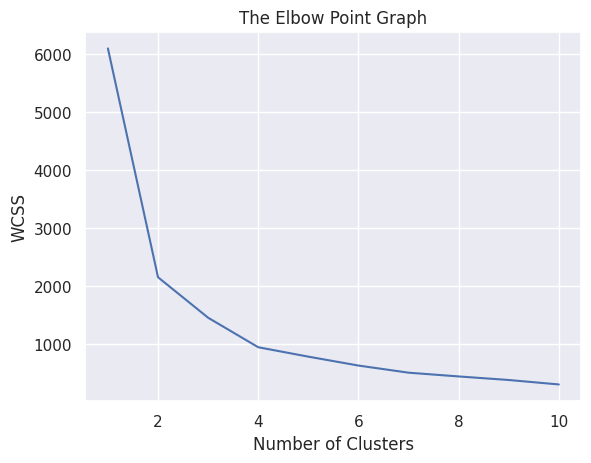

In [ ]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
 # Assuming you determined the optimal k to be 5 from the elbow method
optimal_k = 4  # Replace 5 with the actual optimal k you found

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
Y = kmeans.fit_predict(X)  # Use X, the data you prepared for clustering
print(Y)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 2 2 2 2 2 2 

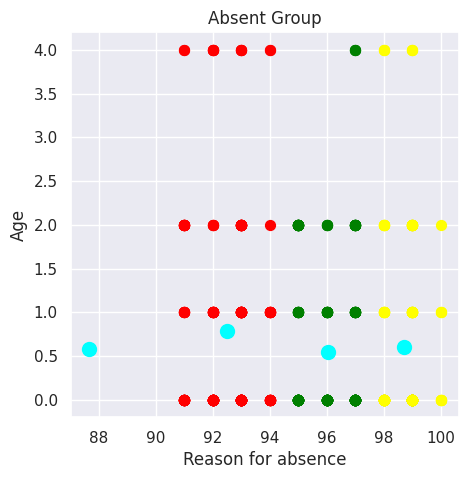

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Absent Group')
plt.xlabel('Reason for absence')
plt.ylabel('Age')
plt.show()

In [ ]:
# Predict cluster labels
labels = kmeans.labels_

# Calculate silhouette score
silhouette_avg = silhouette_score(X, labels)
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.5052400974725111


In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [ ]:
kmeans_pca = KMeans(n_clusters=5, random_state=0)
cluster_labels_pca = kmeans_pca.fit_predict(X_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
score_with_pca = silhouette_score(X_pca, cluster_labels_pca)
print("Silhouette Score with PCA: ", score_with_pca)

Silhouette Score with PCA:  0.4906426776647694
